In [136]:
from dataclasses import dataclass
import numpy as np
from matplotlib import pyplot as plt

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{bm}')
plt.rcParams['figure.figsize'] = [6, 2]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = plt.rcParams['xtick.labelsize']
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['patch.linewidth'] = 0.7
plt.rcParams['hatch.linewidth'] = 0.7
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = plt.rcParams['xtick.major.width']
plt.rcParams['ytick.minor.width'] = plt.rcParams['xtick.minor.width']

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
marker_cycle = ['o', 's', 'v', 'D', 'P', 'X', '*']

In [147]:
# load data as dataclass

@dataclass
class GCVData:
    cv_reg_errs: np.ndarray
    cv_cls_errs: np.ndarray
    test_reg_errs: np.ndarray
    test_cls_errs: np.ndarray
    gcv_reg_errs: np.ndarray
    gcv_cls_errs: np.ndarray
    lamdas: np.ndarray
    sketches: np.ndarray
    Ks: np.ndarray
    n_ens: int
    q: int
    n_trials: int
    p: int
    n_train: int
    n_test: int

data = np.load('results/rna-seq.npz')
rnaseq = GCVData(**{k: data[k] for k in data.files})

data = np.load('results/rcv1.npz')
rcv1 = GCVData(**{k: data[k] for k in data.files})


In [148]:
rcv1.gcv_reg_errs.shape, rcv1.cv_reg_errs.shape

((10, 1, 251), (10, 1, 1, 251))

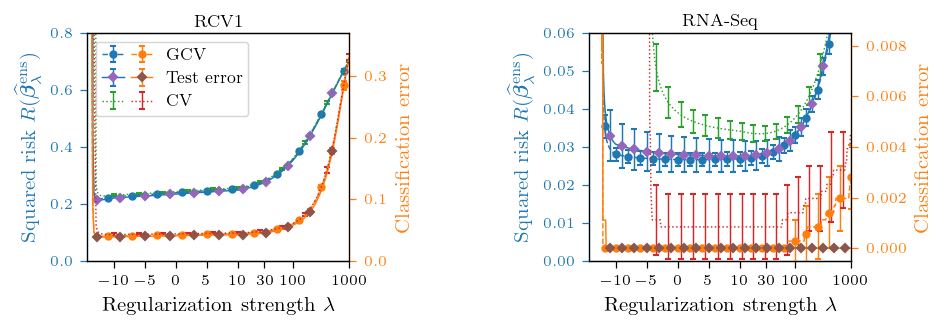

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.3))
capsize = 1.5
reg_color = color_cycle[0]
reg_test_color = color_cycle[4]
cls_color = color_cycle[1]
cls_test_color = color_cycle[5]
cv_reg_color = color_cycle[2]
cv_cls_color = color_cycle[3]
gcv_line = '--'
test_line = '-'
cv_line = ':'
gcv_marker = 'o'
test_marker = 'D'

# split x axes
twinx = [ax.twinx() for ax in axes]

# plot rcv1
##################################################
ax = axes[0]
twin = twinx[0]
ax.set_title('RCV1')
ax.set_xlabel(r'Regularization strength $\lambda$')
ax.set_ylabel(r'Squared risk $R(\widehat{\bm \beta}^\mathrm{ens}_\lambda)$')
twin.set_ylabel('Classification error')
ax.set_xscale('symlog', linthresh=10)
ax.set_ylim(0, 0.8)
ax.set_xlim(-30, 1000)
xticks = [-10, -5, 0, 5, 10, 30, 100, 1000]
ax.set_xticks(xticks,  [f'${x}$' for x in xticks])
twin.set_ylim(0, 0.37)

# color y axes and titles
ax.spines['left'].set_color(reg_color)
ax.spines['right'].set_color(cls_color)
ax.tick_params(axis='y', colors=reg_color)
twin.tick_params(axis='y', colors=cls_color)
ax.yaxis.label.set_color(reg_color)
twin.yaxis.label.set_color(cls_color)

rcv1_sketch_idx = 0

# plot gcv and test errors
gcv_markevery = (5, 20)
gcv_reg_errb = ax.errorbar(rcv1.lamdas, np.mean(rcv1.gcv_reg_errs[:, rcv1_sketch_idx, :], axis=0), yerr=np.std(rcv1.gcv_reg_errs[:, rcv1_sketch_idx, :], axis=0), linestyle=gcv_line, color=reg_color, capsize=capsize, errorevery=gcv_markevery, markevery=gcv_markevery, marker=gcv_marker, label='GCV')
test_markevery = (15, 20)
test_reg_errb = ax.errorbar(rcv1.lamdas, np.mean(rcv1.test_reg_errs[:, rcv1_sketch_idx, :], axis=0), yerr=np.std(rcv1.test_reg_errs[:, rcv1_sketch_idx, :], axis=0), linestyle=test_line, color=reg_color, capsize=capsize, errorevery=test_markevery, markevery=test_markevery, marker=test_marker, label='Test error', markeredgecolor=reg_test_color, markerfacecolor=reg_test_color)

gcv_cls_errb = twin.errorbar(rcv1.lamdas, np.mean(rcv1.gcv_cls_errs[:, rcv1_sketch_idx, :], axis=0), yerr=np.std(rcv1.gcv_cls_errs[:, rcv1_sketch_idx, :], axis=0), linestyle=gcv_line, color=cls_color, capsize=capsize, errorevery=gcv_markevery, markevery=gcv_markevery, marker=gcv_marker, label='GCV')
test_cls_errb = twin.errorbar(rcv1.lamdas, np.mean(rcv1.test_cls_errs[:, rcv1_sketch_idx, :], axis=0), yerr=np.std(rcv1.test_cls_errs[:, rcv1_sketch_idx, :], axis=0), linestyle=test_line, color=cls_color, capsize=capsize, errorevery=test_markevery, markevery=test_markevery, marker=test_marker, label='Test error', markeredgecolor=cls_test_color, markerfacecolor=cls_test_color)

# plot cv errors
cv_markevery = (10, 20)
for i, K in enumerate(rcv1.Ks):
    if K != 2:
        continue
    cv_reg_errb = ax.errorbar(rcv1.lamdas, np.mean(rcv1.cv_reg_errs[:, rcv1_sketch_idx, i, :], axis=0), yerr=np.std(rcv1.cv_reg_errs[:, rcv1_sketch_idx, i, :], axis=0), linestyle=cv_line, color=cv_reg_color, capsize=capsize, errorevery=cv_markevery, markevery=cv_markevery, label='CV')
    cv_cls_errb = twin.errorbar(rcv1.lamdas, np.mean(rcv1.cv_cls_errs[:, rcv1_sketch_idx, i, :], axis=0), yerr=np.std(rcv1.cv_cls_errs[:, rcv1_sketch_idx, i, :], axis=0), linestyle=cv_line, color=cv_cls_color, capsize=capsize, errorevery=cv_markevery, markevery=cv_markevery, label='CV')

from matplotlib.legend_handler import HandlerTuple
ax.legend(
    [tuple([gcv_reg_errb, gcv_cls_errb]), tuple([test_reg_errb, test_cls_errb]), tuple([cv_reg_errb, cv_cls_errb])],
    ['GCV', 'Test error', 'CV'],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    numpoints=1, handlelength=3,
    loc='upper left'
)

# plot rnaseq
##################################################

ax = axes[1]
twin = twinx[1]
ax.set_title('RNA-Seq')
ax.set_xlabel(r'Regularization strength $\lambda$')
ax.set_ylabel(r'Squared risk $R(\widehat{\bm \beta}^\mathrm{ens}_\lambda)$')
twin.set_ylabel('Classification error')
ax.set_xscale('symlog', linthresh=10)
ax.set_ylim(0, 0.06)
ax.set_xlim(-30, 1000)
xticks = [-10, -5, 0, 5, 10, 30, 100, 1000]
ax.set_xticks(xticks, [f'${x}$' for x in xticks])
twin.set_ylim(-0.0005, 0.0085)

# color y axes and titles
ax.spines['left'].set_color(reg_color)
ax.spines['right'].set_color(cls_color)
ax.tick_params(axis='y', colors=reg_color)
twin.tick_params(axis='y', colors=cls_color)
ax.yaxis.label.set_color(reg_color)
twin.yaxis.label.set_color(cls_color)

rnaseq_sketch_idx = 0

# plot gcv and test errors
gcv_markevery = (0, 20)
ax.errorbar(rnaseq.lamdas, np.mean(rnaseq.gcv_reg_errs[:, rnaseq_sketch_idx, :], axis=0), yerr=np.std(rnaseq.gcv_reg_errs[:, rnaseq_sketch_idx, :], axis=0), linestyle=gcv_line, color=reg_color, capsize=capsize, errorevery=gcv_markevery, markevery=gcv_markevery, marker=gcv_marker, label='GCV')
test_markevery = (10, 20)
ax.errorbar(rnaseq.lamdas, np.mean(rnaseq.test_reg_errs[:, rnaseq_sketch_idx, :], axis=0), yerr=np.std(rnaseq.test_reg_errs[:, rnaseq_sketch_idx, :], axis=0), linestyle=test_line, color=reg_color, capsize=capsize, errorevery=test_markevery, markevery=test_markevery, marker=test_marker, label='Test error', markeredgecolor=reg_test_color, markerfacecolor=reg_test_color)

twin.errorbar(rnaseq.lamdas, np.mean(rnaseq.gcv_cls_errs[:, rnaseq_sketch_idx, :], axis=0), yerr=np.std(rnaseq.gcv_cls_errs[:, rnaseq_sketch_idx, :], axis=0), linestyle=gcv_line, color=cls_color, capsize=capsize, errorevery=gcv_markevery, markevery=gcv_markevery, marker=gcv_marker, label='GCV')
twin.errorbar(rnaseq.lamdas, np.mean(rnaseq.test_cls_errs[:, rnaseq_sketch_idx, :], axis=0), yerr=np.std(rnaseq.test_cls_errs[:, rnaseq_sketch_idx, :], axis=0), linestyle=test_line, color=cls_color, capsize=capsize, errorevery=test_markevery, markevery=test_markevery, marker=test_marker, label='Test error', markeredgecolor=cls_test_color, markerfacecolor=cls_test_color)

# plot cv errors
for i, K in enumerate(rnaseq.Ks):
    if K != 2:
        continue
    cv_markevery = (5, 20)
    ax.errorbar(rnaseq.lamdas, np.mean(rnaseq.cv_reg_errs[:, rnaseq_sketch_idx, i, :], axis=0), yerr=np.std(rnaseq.cv_reg_errs[:, rnaseq_sketch_idx, i, :], axis=0), linestyle=cv_line, color=cv_reg_color, markevery=cv_markevery, errorevery=cv_markevery, capsize=capsize, label='CV') 
    twin.errorbar(rnaseq.lamdas, np.mean(rnaseq.cv_cls_errs[:, rnaseq_sketch_idx, i, :], axis=0), yerr=np.std(rnaseq.cv_cls_errs[:, rnaseq_sketch_idx, i, :], axis=0), linestyle=cv_line, color=cv_cls_color, markevery=cv_markevery, errorevery=cv_markevery, capsize=capsize, label='CV')

plt.tight_layout()

# move second plot to right
pos = axes[1].get_position()
pos.x0 += 0.07
pos.x1 += 0.07
axes[1].set_position(pos)

plt.savefig('figures/real-data.pdf', bbox_inches='tight')
plt.show()

In [151]:
print('Dataset summaries:')
print('=' * 80)
print('RCV1')
print('-' * 80)
print(f'Training samples: {rcv1.n_train}')
print(f'Test samples: {rcv1.n_test}')
print(f'Features: {rcv1.p}')
print(f'Sketch size: {rcv1.q}')
print(f'Ensemble size: {rcv1.n_ens}')
print('-' * 80)
print('RNA-Seq')
print('-' * 80)
print(f'Training samples: {rnaseq.n_train}')
print(f'Test samples: {rnaseq.n_test}')
print(f'Features: {rnaseq.p}')
print(f'Sketch size: {rnaseq.q}')
print(f'Ensemble size: {rnaseq.n_ens}')
print('=' * 80)


Dataset summaries:
RCV1
--------------------------------------------------------------------------------
Training samples: 20000
Test samples: 5000
Features: 30617
Sketch size: 515
Ensemble size: 5
--------------------------------------------------------------------------------
RNA-Seq
--------------------------------------------------------------------------------
Training samples: 356
Test samples: 90
Features: 20223
Sketch size: 99
Ensemble size: 5
